# Lecture 04 - Linear Regression

<p><a name="sections"></a></p>


## Sections

- <a href="#linear">Linear Regression</a><br>
 - <a href="#coeff">The Coefficients</a><br>
 - <a href="#error">The Errors</a><br>
   - <a href="#assumption">The Basic Assumptions on Linear Regression</a><br>
 - <a href="#estimate">Estimating the Coefficients</a><br>
    - <a href="#residual">Residuals</a><br>
    - <a href="#formula">The Formula for the Coefficients</a><br>
 - <a href="#rsquare">Evaluating the Model: Coefficient of Determination</a><br>
 - <a href="#reg_sklearn">Linear Regression in Scikit-Learn</a><br>
- <a href="#multi_reg">Multiple Linear Regression - Model</a><br>
 - <a href="#matrix">Least Square in Matrix Notation</a><br>
 - <a href="#multi_sklearn">Multiple Linear Regression in Scikit-Learn</a><br>
 - <a href="#case">Case Study</a><br>
    - <a href="#descriptive">Descriptive Statistics</a><br>
    - <a href="#ex3">Exercise: Descriptive Statistics</a><br>
    - <a href="#dummy">Categorical Input Variables</a><br>
- <a href="#reg">Regularization</a><br>
    - <a href="#ridge">Ridge Regression</a><br>
    - <a href="#ridge-sklearn">Ridge Regression in Scikit-Learn</a><br>
    - <a href="#lasso">Lasso Regression</a><br>
    - <a href="#lasso-sklearn">Lasso Regression in Scikit-Learn</a><br>
    - <a href="#elastic">ElasticNet</a><br>
    - <a href="#elastic-sklearn">ElasticNet in Scikit-Learn</a><br>
- <a href="#ex">Example</a><br>

In [1]:
#### Loading the packages to be used
from __future__ import print_function  # Python 2 and 3
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

<p><a name="linear"></a></p>

## Linear Regression

Linear regression is a supervised machine learning method that aims to uncover the relationship between continuous variables:

- One or more explanatory/independent/input variables $X_1, X_2,..., X_p$.
- The response/dependent/output variable Y.


**Simple linear regression** is a special case when there is only one explanatory variable $X$. In this case, the relation can be represented quantitatively by:
$$
Y = \beta_0 + \beta_1X + \epsilon
$$

- $\beta_0$ and $\beta_1$ are two unknown constants that represent the intercept and slope.
- $\epsilon$ is called the error term.  This represents the deviation of the value from the linearity.



For example, Okun's law in macroeconomics can be modeled by simple linear regression. Here the GDP growth is presumed to be in a linear relationship with the changes in the unemployment rate.

<img src="https://upload.wikimedia.org/wikipedia/commons/7/77/Okuns_law_quarterly_differences.svg">
*Source: https://en.wikipedia.org/wiki/Simple_linear_regression*

- Okun's law can be modeled as

$$ GDP = \beta_0 + \beta_1 ( \text{unemployment rate}) + \epsilon$$

<p><a name="coeff"></a></p>

### The Coefficients

Below we visualize our simple linear model with an example $Y = 1 + 0.5 X + \epsilon$.  ($\beta_0 = 1$ and $\beta_1=0.5)$

- $\beta_0$ and $\beta_1$ defines the linear relation. This means that if we observe a set of n independent variables $X = (x_1, x_2, ..., x_n)$:

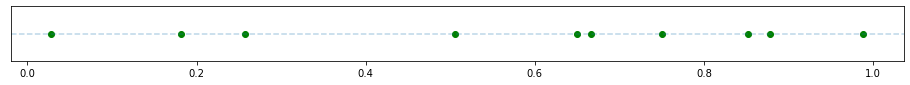

In [2]:
np.random.seed(18)
N = 10
X = np.random.rand(N)
X = np.array(sorted(X))

plt.figure(figsize=(16, 1))
plt.scatter(X, np.zeros(N), color='green')
plt.yticks([])
plt.ylim(-0.2, 0.2)
plt.axhline(y=0, alpha=0.3, ls='dashed')
plt.show()

The linear relation $Y = 1 + 0.5X$ indicates that the outcome $Y = (y_1, y_2, ..., y_n)$ should be:

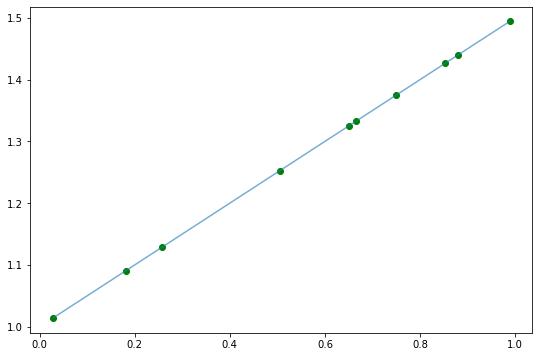

In [3]:
beta_0 = 1
beta_1 = 0.5
Y = beta_1*X + beta_0 

figure = plt.figure(figsize=(9, 6))
plt.plot(X, beta_1 * X + beta_0, figure=figure, alpha=0.6)
plt.scatter(X, Y, figure=figure, color='green')
plt.show()

Note that there is **NO** randomness involved. We say that $\beta_0 \text{ and } \beta_1$ are **constant**. Note that $\beta_0 \text{ and } \beta_1$ are in fact the **intercept** and the **slope** respectively.

<p><a name="error"></a></p>

### The Errors

All the randomness are attributed to $ \epsilon $. The relation $Y = 1 + 0.5X + \epsilon \text{ becomes: }$

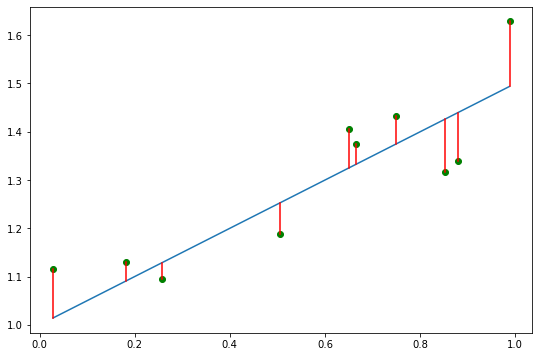

In [4]:
error = np.random.normal(0, 0.1, N)
Y = beta_0 + beta_1*X + error
figure = plt.figure(figsize=(9, 6))
plt.scatter(X, Y, color='green')
plt.plot(X, beta_0 + beta_1*X)
for i in range(N):
    plt.plot([X[i], X[i]], [beta_0+beta_1*X[i], Y[i]], color='red')
plt.show()

<p><a name="assumption"></a></p>

#### The Basic Assumptions on Linear Regression

The basic assumptions of a simple linear model are:

- Linearity
- Normality
- Constant Variance
- Independent Errors

<p><a name="linearity"></a></p>

#### Linearity

Linearity defines the relation between $X \text{ and } Y$. As we saw in the previous plot, it is represented by $\beta_0 \text{ and } \beta_1$.

We will discuss how these two constants are estimated.

<p><a name="on_error"></a></p>

#### Assumptions on the Errors

We cannot estimate $\epsilon$ mainly because it is random. However, we can still study some properties of the randomness. The last three assumptions (all but linearity) on linear model describe what kind of randomness $\epsilon$ should be.

**Normality**

Randomness are often described by **distribution**, which can be seen only when we have a lot of samples. So let's create a much larger sample set:

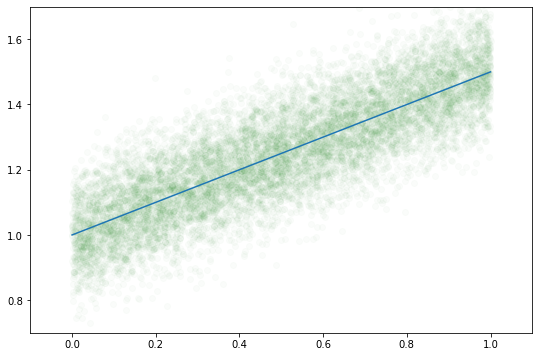

In [5]:
N = int(1e4)
np.random.seed(168)
X = np.random.rand(N)
X = np.array(sorted(X))
error = np.random.normal(0, 0.1, N)
Y = beta_0 + beta_1 * X + error

plt.figure(figsize=(9, 6))
plt.scatter(X, Y, alpha=0.02, color='green')
plt.plot(X, beta_0 + beta_1 * X)
plt.ylim(0.7, 1.7)
plt.xlim(-0.1, 1.1)
plt.show()

- And again we visualize the error with some of the $X$:

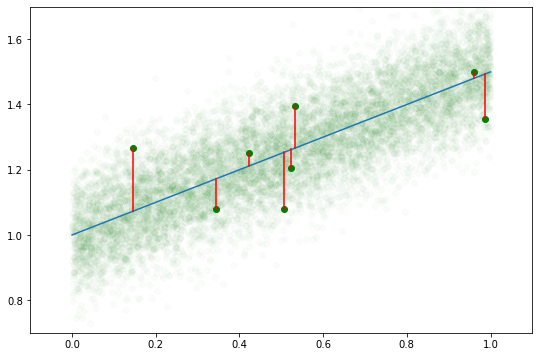

In [6]:
np.random.seed(1127)

plt.figure(figsize=(9, 6))
plt.scatter(X, Y, alpha=0.02, color='green')
plt.plot(X, beta_0 + beta_1 * X)
plt.ylim(0.7, 1.7)
plt.xlim(-0.1, 1.1)

example = np.random.choice(np.arange(N), size=8, replace=False)
for i in example:
    plt.scatter(X[i], Y[i], alpha=1, color='green')
    plt.plot([X[i], X[i]], [beta_0 + beta_1 * X[i], Y[i]], color='red')
plt.show()

- The normality assumption means if we sketch the histogram of the errors, it looks like:

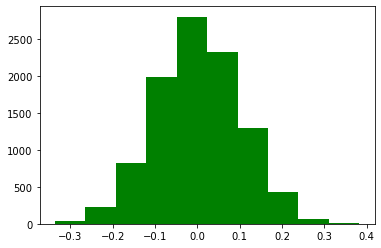

In [7]:
plt.hist(error, color='green', bins=10)
plt.show()

Note that the **mean** and the **standard deviation** of our errors are:

In [8]:
print('The mean of the errors is %.4f' %np.mean(error))
print('The standard deviation of the errors is %.4f' % np.std(error))

The mean of the errors is 0.0018
The standard deviation of the errors is 0.0995


**Constant Variance and Independent Errors**

The following two conditions:
- constant variance
- independent errors

indicate that the error of each observation is drawn independently from the same probability distribution. **Why?**



**How do we check that?**

- For a **single** observation, the relationship between the error and its distribution is weak. However, if all the errors obey the same distribution, we should obtain the same (or very similar) bell shape curve when we randomly choose a (large enough) subset from the observations.

For example, let's pick the observations from $X$ which are less than 0.5 and compare the normal distribution obtained from them with the one obtained from the full sample. You are invited to change the range of observations selected below and make the same comparison.

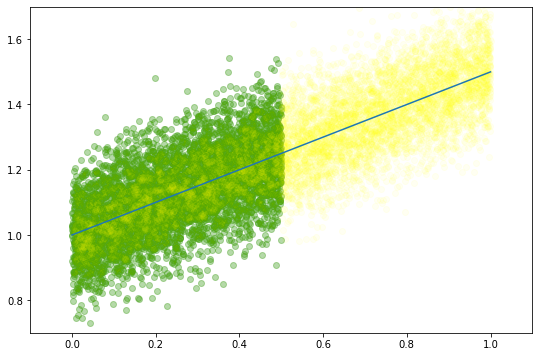

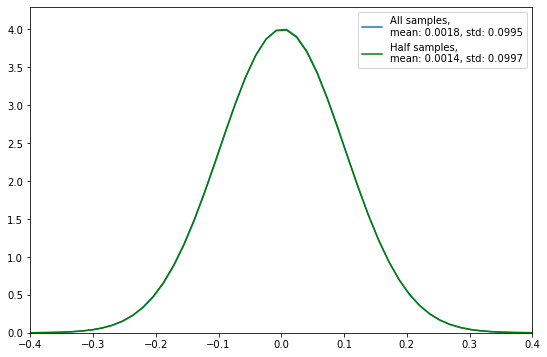

In [9]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

index = np.where(np.logical_and(X > 0, X < 0.5))
sub_X = X[index]
sub_Y = Y[index]

plt.figure(figsize=(9, 6))
plt.ylim(0.7, 1.7)
plt.xlim(-0.1, 1.1)
plt.scatter(sub_X, sub_Y, alpha=0.3, color='green')
plt.scatter(X, Y, alpha=0.05, color='yellow')
plt.plot(X, beta_0 + beta_1 * X)

sub_error = sub_Y - (beta_0 + beta_1 * sub_X)

plt.figure(figsize=(9, 6))
plt.xlim(-0.4, 0.4)
plt.ylim(0, 4.3)

my_norm = stats.norm(np.mean(error), np.std(error)).pdf
label = 'All samples,\nmean: %.4f, std: %.4f' % (np.mean(error), np.std(error))
plt.plot(np.linspace(-0.4, 0.4), my_norm(np.linspace(-0.4, 0.4)), label=label)

my_norm = stats.norm(np.mean(sub_error), np.std(sub_error)).pdf
label = 'Half samples,\nmean: %.4f, std: %.4f' % (np.mean(sub_error), np.std(sub_error))
plt.plot(np.linspace(-0.4, 0.4), my_norm(np.linspace(-0.4, 0.4)), color='green', label=label)

plt.legend()
plt.show()

- We may also just randomly select the subset and make the same comparison. Again you are invited to change the amount of observations selected below.

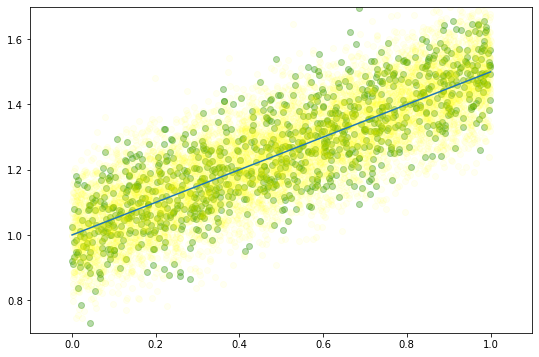

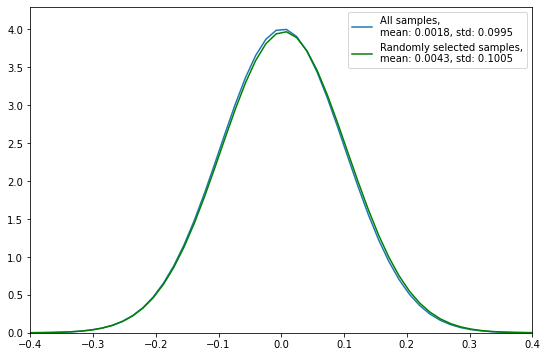

In [10]:
#### You may run the code below multiple times; each time we run it we are selecting different 
#### subset. You might also change the size of subset.
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

size = 1000
index = np.random.choice(N, size, replace=False)
sub_X = X[index]
sub_Y = Y[index]
sub_error = sub_Y - (1 + 0.5 * sub_X)

sub_X = X[index]
sub_Y = Y[index]

plt.figure(figsize=(9, 6))
plt.ylim(0.7, 1.7)
plt.xlim(-0.1, 1.1)
plt.scatter(sub_X, sub_Y, alpha=0.3, color='green')
plt.scatter(X, Y, alpha=0.05, color='yellow')
plt.plot(X, beta_0 + beta_1 * X)

plt.figure(figsize=(9, 6))
plt.xlim(-0.4, 0.4)
plt.ylim(0, 4.3)

my_norm = stats.norm(np.mean(error), np.std(error)).pdf
label = 'All samples,\nmean: %.4f, std: %.4f' % (np.mean(error), np.std(error))
plt.plot(np.linspace(-0.4, 0.4), my_norm(np.linspace(-0.4, 0.4)), label=label)

my_norm = stats.norm(np.mean(sub_error), np.std(sub_error)).pdf
label = 'Randomly selected samples,\nmean: %.4f, std: %.4f' % (np.mean(sub_error), np.std(sub_error))
plt.plot(np.linspace(-0.4, 0.4), my_norm(np.linspace(-0.4, 0.4)), color='green', label=label)

plt.legend()
plt.show()

<p><a name="estimate"></a></p>

### Estimating the Coefficients

In general, the optimal $\beta_0$ and $\beta_1$ are unknown a priori. What we are given is a set of observations $X \text{ and } Y$. Essentially what we do is to **try** all the possible pairs of $\beta_0 \text{ and } \beta_1$, and find the pair defining the linear model most "similar" to the observations.

- We again illustrate the process with visualization. For simplicity, we stick to 10 observations:

In [11]:
from sklearn.preprocessing import MaxAbsScaler
scaler=MaxAbsScaler()
norm_error=scaler.fit_transform(error.reshape(-1,1))

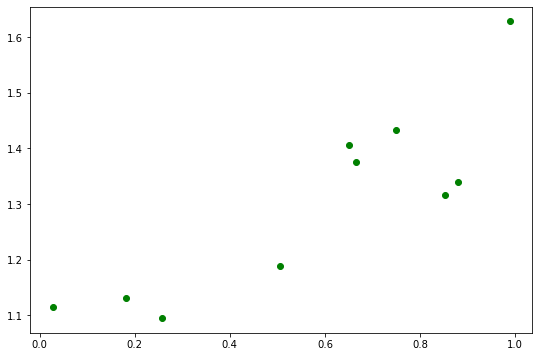

In [12]:
np.random.seed(18)
N = 10
X = np.random.rand(N)
X = np.array(sorted(X))

error = np.random.normal(0, 0.1, N)
Y = beta_0 + beta_1 * X + error
plt.figure(figsize=(9, 6))
plt.scatter(X, Y, color='green')
plt.show()

<p><a name="residual"></a></p>

#### Residuals

- We then start trying out some pair of $( \tilde{\beta}_0, \tilde{\beta}_1) \text{ , say, } (0.5, 1)$.

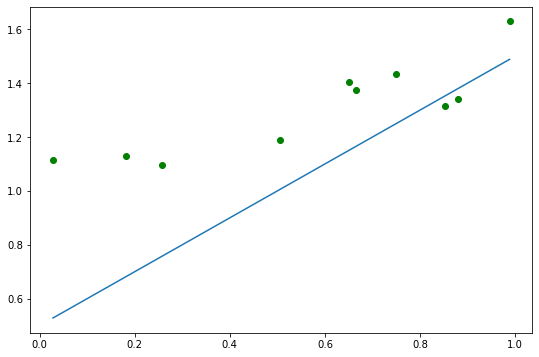

In [13]:
plt.figure(figsize=(9, 6))
plt.scatter(X, Y, color='green')
plt.plot(X, 0.5 + X)
plt.show()

How different is the model from the observations?

- We may again consider the difference between the observation and the model:
$$
e = Y - (\tilde{\beta_0} + \tilde{\beta_1} X) 
$$

This difference vector is called the **residual**.

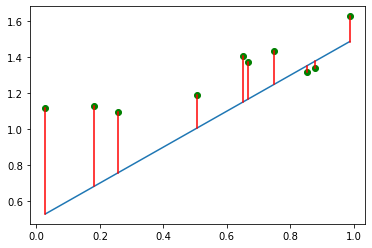

In [14]:
plt.figure(figsize=(6, 4))
plt.scatter(X, Y, color='green')
plt.plot(X, 0.5 + X)
for i in range(N):
    plt.plot([X[i], X[i]], [0.5+X[i], Y[i]], color='red')
plt.show()

To quantify the difference between the model and the observations, we use the **residual sum of squares**, or **RSS**. It is defined by:
$$
\text{ } \\
\text{Denote } e = (e_1, e_2, e_3, ..., e_n) \\
\text{ } \\
\begin{align*} 
RSS(\tilde{\beta_0}, \tilde{\beta_1})=& e_1^2 + e_2^2 + ... + e_n^2
\\ 
=&\sum_{i=1}^{n}(y_i-\tilde{\beta}_0-\tilde{\beta}_1x_i)^2
\end{align*}
$$

- Therefore RSS depends on ( $\tilde{\beta_0}$, $\tilde{\beta_1}$).
- Below we see that indeed the model with least RSS is most similar to the observations.

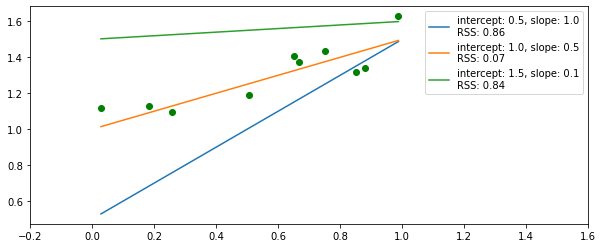

In [15]:
fig = plt.figure(figsize=(10, 4))
plt.scatter(X, Y, color='green')

plt.xlim(-0.2, 1.6)

for b0, b1 in [(0.5, 1), (1, 0.5), (1.5, 0.1)]:
    res = Y - (b0 + b1 * X)
    text = 'intercept: %.1f, slope: %.1f\nRSS: %.2f' %(b0, b1, np.sum(res**2))
    plt.plot(X, b0 + b1 * X, label=text)

plt.legend()
plt.show()

The coefficients that really minimize RSS are denoted by $(\hat{\beta_0}, \hat{\beta_1})$. And the linear model is denoted by:

$$\hat{Y} = \hat{\beta}_0 + \hat{\beta}_1X$$

- The symbol $\hat{}$ denotes an estimated value. The coefficients $(\hat{\beta_0}, \hat{\beta_1})$ are called the **ordinary least square estimator**, (**OLS**). Once we have the estimators and a newly observed $X$, the corresponding $Y$ can be predicted by passing $X$ into the formula above.

<p><a name="formula"></a></p>

#### The Formula of the Coefficients -- The Normal Equation

- Minimizing the RSS characterizes the coefficients $(\hat{\beta_0}, \hat{\beta_1})$ uniquely. We will not discuss how to derive them, it is actually the standard optimization problem by differentiation. $(\hat{\beta_0}, \hat{\beta_1})$ actually admits a closed form:

$$
\begin{align}
\text{ }\\
\hat{\beta}_1&=\frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n(x_i-\bar{x})^2}
\\
\hat{\beta}_0&=\bar{y}-\hat{\beta}_1\bar{x}\\
\text{ }\\
\text{wh}&\text{ere } \bar{y} \text{ and } \bar{x} \text{ are the sample means of } x_i \text{ and } y_i, \text{ respectively.} 
\end{align}
$$

- Of course, if you don't care about math, scikit-learn will find the coefficients for us.

<p><a name="rsquare"></a></p>

### Evaluating the Model: Coefficient of Determination

- Once we fit a linear model, how should we assess the overall accuracy of the model?

- The usual way to measure the overall accuracy of a simple linear model is to use the **coefficient of determination**.

- The coefficient of determination, denoted $R^2$, measures how well a model fits the data.

- $R^2$ is defined as
$$R^2=1-\frac{RSS}{TSS}$$
  where TSS is the total sum of squares:
$$TSS=\sum_{i=1}^{n}(y_i-\bar{y})^2$$

- RSS (The total area of the blue squares) represents the squared residuals with respect to the linear regression. 

- TSS (The total area of the red squares) represents the squared residuals with respect to the average value and is fixed if data is known. (Can you tell why?)

- Therefore the coefficient of determination is a number $\in [0,1]$ that gauges the proportion of the variance in the dependent variable that is predictable from the independent variable.

<img src="https://upload.wikimedia.org/wikipedia/commons/8/86/Coefficient_of_Determination.svg" style="width: 500px;">
*Source: https://en.wikipedia.org/wiki/Coefficient_of_determination. The areas of the red squares represent TSS. The areas of the blue squares represent RSS.
*

- Given a dataset, TSS is model independent, the fitted model has the minimum RSS among all linear models:

  - $R^2 = 1$ indicates that the regression line fits the data perfectly (no error).
  
  - $R^2 = 0$ indicates that the line fits the data not better than the null model (horizontal $y=\bar{y})$.
  
  - In general, the better the linear regression fits the data in comparison to the sample average, the closer the value of $R^2$ is to 1.

<p><a name="reg_sklearn"></a></p>

### Linear Regression in Scikit-Learn

In [16]:
#### In case you change the variables, let create them again:
#### Loading the packages to be used
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats

beta_0 = 1
beta_1 = 0.5

np.random.seed(18)
N = 10
X = np.random.rand(N)
X = np.array(sorted(X))
error = np.random.normal(0, 0.1, N)
Y = beta_0 + beta_1 * X + error

- To fit a linear model with scikit-learn, first we need to import **`linear_model`** from **`sklearn`**. 

- Then we create a **`LinearRegression`** instance, which uses the **`OLS`** method to fit a linear model.

In [17]:
from sklearn import linear_model
ols = linear_model.LinearRegression()

# Also valid Python syntax:
# from sklearn.linear_model import LinearRegression
# ols = LinearRegression()

Some attributes and methods we will use for linear regression:

- `coef_`: Estimated coefficients ($\hat{\beta}_1$,...) for the linear regression problem.
- `intercept_`: Independent term ($\hat{\beta}_0$) in the linear model.
- `fit(X, y)`: Fit linear model.
- `predict(X)`: Predict using the linear model
- `score(X, y)`: Returns the coefficient of determination $R^2$ of the prediction.


In [18]:
# Attributes and methods may differ in different versions of scikit-learn.
# You can find the current version's by adding a question mark after any variable, class or function
# This is known as an iPython "magic" command
ols?

**Fitting**

Next we fit a simple linear model with the data set.

- Once we fit the model, the coefficients can be accessed via `coef_` and `intercept_` attributes.

In [19]:
ols.fit(X.reshape(-1,1), Y)   #### What happen if we remove the 'reshape' method? 
print("beta_1: %.3f" %ols.coef_)
print("beta_0: %.3f" %ols.intercept_)

beta_1: 0.457
beta_0: 1.040


**Predicting**

- To make prediction with the fitted model, we simply pass a **column vector** to `predict()`.

[1.05251398 1.12263584 1.15694823 1.27043576 1.33662371 1.3438067
 1.38218682 1.42881625 1.44085917 1.49077568]


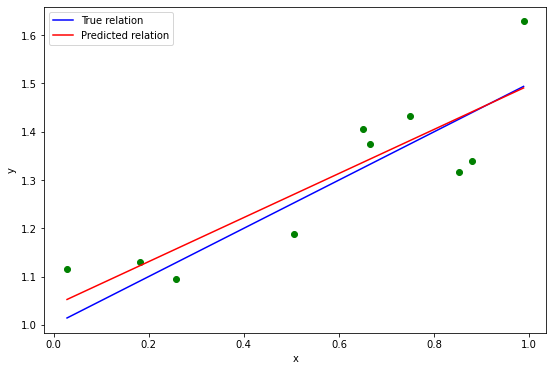

In [20]:
#### For convenience, let's update X
X = X.reshape(-1,1)
print(ols.predict(X))

plt.figure(figsize=(9, 6))
plt.plot(X, beta_0 + beta_1*X, c='b', lw=1.5, label='True relation')
plt.plot(X, ols.predict(X), c='r', lw=1.5, label='Predicted relation')
plt.scatter(X, Y, color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2)
plt.show()

In [21]:
#### predict: prediction
print("RSS: %.2f" % np.sum((Y - ols.predict(X)) ** 2))
#ols.residues_  # will be deprecated in version 0.19
## score: the R^2 of the fitted model
print('R^2: %.2f' % ols.score(X, Y))

RSS: 0.06
R^2: 0.75


- The RSS is 0.06, which is better than passing any other pair into the function $RSS$.

- The $R^2$ is 75%, which means that 75% of the variance of Y can be explained by variable X.

<p><a name="multi_reg"></a></p>

## Multiple Linear Regression - Model

- In reality, the output Y often depends on multiple input variables. Suppose that we would like to study the dependence of *Income* on both *Years of Education* and *Seniority*. Since there are two independent variables, the linear model can no longer be represented by a line -- but a **plane** in 3D:

<img src="http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/R/R5_Correlation-Regression/MultipleLinearRegression-Plane.png" style="height: 300px;">
*Source: James et al. Introduction to Statistical Learning (Springer 2013)*

- In general, if the output $Y$ depends on more than one input variable, say $X_1$, $X_2$, ... $X_p$, then we need to generalize our linear model as

$$\hat{Y}=\hat{\beta}_0+\sum_{i=1}^p\hat{\beta}_iX_i$$

- It is very common that we include the constant 1 in $X$ and use the notation

$$\hat{\beta}=(\hat{\beta_0}, \hat{\beta_1}, ... ,\hat{\beta_p})^T$$
$$X=(1, X_1, ..., X_p)$$

- Note that $X \text{ now becomes a } N\times (p+1)$ matrix. Then we can write the model in a matrix notation:

$$\hat{Y}=X\hat{\beta},$$

with $\hat{beta}$ being a $(p+1)\times 1$ matrix (i.e. a vector).

<p><a name="matrix"></a></p>

#### Least Square in Matrix Notation

The matrix notation is convenient for estimating:

- **residual**: In matrix notation, the RSS can be written as the following:

$$RSS(\beta)=(Y-X\beta)^T(Y- X\beta)$$

- **fitting**: Again differentiating RSS with respect to $\beta$ and setting the result to zero (why?), we get the so-called 'normal equation':

$$\hat{\beta}=(X^TX)^{-1}X^T Y$$

- **Note**: when two or more input variables are highly correlated with each other, then $X^T X$ is close to be singular (i.e. $det(X^TX)\sim 0$) and the solution $\hat{\beta}$ will be numerically unstable - any tiny fluctuations of data will cause huge changes of the model.

### Multiple Linear Regression in Scikit-Learn
We create a random data set of two independent variables using the model:

$$Y = 2 - 7.0X_1 + 5.0X_2 + \epsilon$$

In [22]:
np.random.seed(1)
N = 30
## generate a random array with 2 columns
beta = np.array([2, -7, 5])
x_m = np.random.randn(N, 2)
y_m = np.dot(np.append(np.ones((N,1)), x_m, axis=1), beta) + np.random.randn(N)*4

Let’s visualize the data set in both 2D and 3D: 

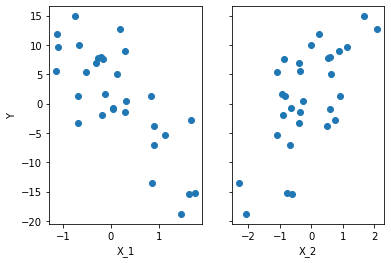

In [23]:
## use subplots to make two scatter plots side by side
_, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(x_m[:,0], y_m)
ax2.scatter(x_m[:,1], y_m)
ax1.set_xlabel('X_1')
ax1.set_ylabel('Y')
ax2.set_xlabel('X_2')
plt.show()

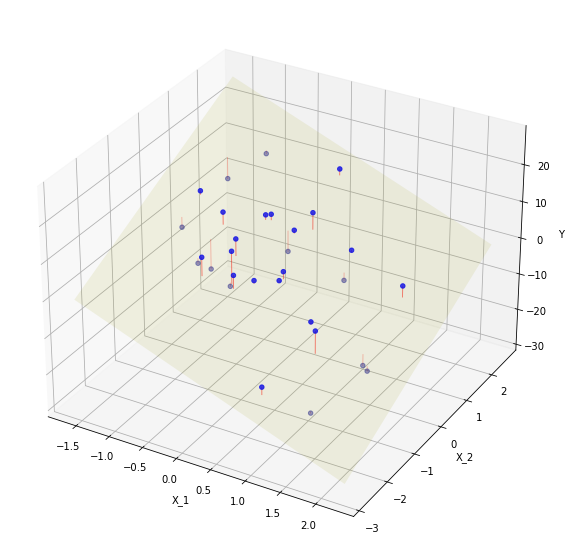

In [24]:
## 3D scatter plot

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 10))
ax = plt.axes(projection='3d')
# plot the data points
X = np.array(list(map(lambda x: [1] + list(x), x_m)))  # Idiomatic Py3, but inefficient on Py2
up = np.where(y_m >= np.sum(X*beta, axis=1))[0]
down = np.where(y_m < np.sum(X*beta, axis=1))[0]
ax.scatter(x_m[up, 0], x_m[up, 1], y_m[up], c='blue', alpha=.8)
ax.scatter(x_m[down, 0], x_m[down, 1], y_m[down], c='Darkblue', alpha=.4)

# plot the error bars
ax = fig.gca(projection='3d')
x_up = x_m[up,:]; y_up = y_m[up]
up_kwargs = dict(color='red', alpha=.6, lw=0.8)
for i, j, k in zip(x_up[:, 0], x_up[:, 1], y_up):
    ax.plot([i, i], [j, j], [k, np.dot(beta, [1, i, j])], **up_kwargs)
    
x_down = x_m[down,:]; y_down = y_m[down]
down_kwargs = dict(color='red', alpha=.3, lw=0.8)
for i, j, k in zip(x_down[:,0], x_down[:,1], y_down):
    ax.plot([i, i], [j, j], [k, np.dot(beta, [1, i, j])], **down_kwargs)
    
    
# plot the plane which represents the true model
x_1 = np.linspace(min(x_m[:, 0])-.5, max(x_m[:, 0])+.5, 25)
x_2 = np.linspace(min(x_m[:, 1])-.5, max(x_m[:, 1])+.5, 25)
x_1, x_2 = np.meshgrid(x_1, x_2)
x_3 = beta[1]*x_1 + beta[2]*x_2 + beta[0]
surface_kwargs = dict(rstride=100, cstride=100, color='yellow', alpha=0.1)
ax.plot_surface(x_1, x_2, x_3, **surface_kwargs)
ax.set_xlabel('X_1')
ax.set_ylabel('X_2')
ax.set_zlabel('Y')
plt.show()

**Fitting and Evaluating Multiple Linear Regression**

If the first variable `x` that we pass into `fit()` contains multiple columns, then a multiple linear model is returned. This is why the model needs to take in a 2D array as its X--to check whether the quesiton is a multi-linear regression one.

In [25]:
ols.fit(x_m, y_m)
print("beta_1, beta_2: " + str(np.round(ols.coef_, 3)))
print("beta_0: " + str(np.round(ols.intercept_, 3)))
print("RSS: %.2f" % np.sum((ols.predict(x_m) - y_m) ** 2))
print("R^2: %.5f" % ols.score(x_m, y_m))

beta_1, beta_2: [-6.619  4.436]
beta_0: 2.523
RSS: 356.34
R^2: 0.83938


- By comparing with the true model $Y = 2 - 7.0X_1 + 5.0X_2 + \epsilon$, we can see the estimated coefficients are close to the true values.

**Regression in terms of the Matrix Formula**

Let's calculate the coefficients by using the normal equation we just derived:
$$\hat{\beta}=(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$

In [26]:
import numpy as np
## transform x to a matrix
x_m = np.mat(x_m)
## y transpose converts y into a column vector
y_m = np.mat(y_m).T
## add a column of 1’s to x
x_m = np.column_stack((np.ones([x_m.shape[0], 1]), x_m))
## matrix.I returns the inverse of that matrix
(x_m.T*x_m).I * x_m.T * y_m

matrix([[ 2.52343727],
        [-6.6191147 ],
        [ 4.43620544]])

As you can see, we get exactly the same coefficients as we get from sciki-learn.

<p><a name="reg"></a></p>

## Regularization
- Fit a model using a technique that regularizes the coefficient estimates, or equivalently, that shrinks the coefficient estimates towards zero. 

- Shrinking the coefficient estimates can significantly reduce their variances.

- The two best-known techniques of shrinking methods are **ridge regression** and **lasso**.

<p><a name="ridge"></a></p>

### Ridge Regression

- Recall that the least squares procedure estimates $\beta$ by minimizing
$$\sum_{i=1}^{n} (y^{(i)} - \beta_0 - \sum_{j=1}^{k} \beta_jx_j^{(i)})^2$$

- The **ridge regression** instead estimates $\beta$ by minimizing
$$\sum_{i=1}^{n} (y^{(i)} - \beta_0 - \sum_{j=1}^{k} \beta_jx_j^{(i)})^2 + \lambda \sum_{j=1}^{k}\beta_j^2$$

where $\lambda \ge 0$ is a *tuning parameter* to be determined.


- By adding the term $\lambda \sum_{j=1}^{k}\beta_j^2$ in the loss function, the estimation will try to shrink the parameters toward 0, hence this term is also called the **shrinkage penalty**. This is also called **L2 penalty**.

- The tuning parameter $\lambda$ is used  to control the relative impact of these two terms on the regression coefficient estimates. 
    - When $\lambda = 0$, the ridge estimate is the same  with the least square estimate. 
    - When $\lambda \to \infty$, all the parameters except $\beta_0$ will be 0, because we do not penalize $\beta_0$ in the loss function. 

- Selecting a good value for $\lambda$ is critical. In practice, we will try a grid of  $\lambda$ values and choose the best one.

<p><a name="ridge-sklearn"></a></p>

### Ridge Regression in Scikit-Learn

If you read the documentation of **Ridge** in python, the objective function implemented is:

$$\min_{\theta}  \parallel X\theta - y \parallel_2^2 + \alpha \parallel \theta \parallel_2^2$$

which is the same as the previous formula, except they used $\theta \text{ and } \alpha \text{ in the place of } \beta \text{ and } \lambda$.

Traininging ridge regresison is similar to linear regression:

In [27]:
from sklearn import linear_model
ridge = linear_model.Ridge()

- Below we want to train a ridge model for each $\alpha$, we collect the coefficients in the coef list for visualization later. 

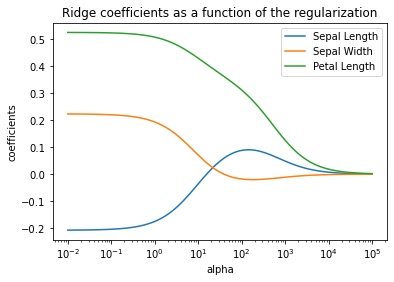

In [28]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()
# use the first three variables to predict the fourth variable
iris.x = iris.data[:, :3]
iris.y = iris.data[:, 3]

alpha_100 = np.logspace(-2, 5, 100)
coef = []
for i in alpha_100:
    ridge.set_params(alpha = i)
    ridge.fit(iris.x, iris.y)
    coef.append(ridge.coef_)

columns = ["Sepal Length", "Sepal Width", "Petal Length"]
df_coef = pd.DataFrame(coef, index=alpha_100, columns=columns)
title = 'Ridge coefficients as a function of the regularization'
df_coef.plot(logx=True, title=title)
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.show()

<p><a name="lasso"></a></p>

### Lasso

- Similar to ridge regression, **Lasso** also add an extra penalty term in the loss function
- But the penalty term is slightly different from the ridge regression's. The loss function of Lasso is :

$$\sum_{i=1}^{n} (y^{(i)} - \beta_0 - \sum_{j=1}^{k} \beta_jx_j^{(i)})^2 + \lambda \sum_{j=1}^{k}|\beta_j|$$

- In Lasso the penalty term $\sum_{j=1}^{k}\beta_j^2$ is replaced by $\sum_{j=1}^{k}|\beta_j|$, this also shrinks the coefficient estimates towards zero. 

- The penalty term Lasso uses is called  **L1 penalty** instead of the **L2 penalty** in ridge regression. 

- However, in the case of the lasso, the L1 penalty has the effect of forcing some of the coefficient estimates to be exactly equal to zero when the tuning parameter $\lambda$ is sufficiently large. 

- Hence the lasso can be used for feature selection. As a result, models generated from the lasso are generally much easier to interpret than those produced by ridge regression.

<p><a name="lasso-sklearn"></a></p>

### Lasso in Scikit-Learn

The objective function of **Lasso** in python is:
$$\min_{\theta} \frac{1}{2n} \parallel X\theta - y \parallel_2^2 + \alpha | \theta |_1$$
where $n$ refers to the number of observations.

- In lasso the sum of squares of residuals is multiplied by a constant $\frac{1}{2n}$
- The constant does not impact the optimal coefficient
- The parameter $\alpha$ is again used to control the effects of the regularization term.

Implementing `Lasso` is similar to ridge regression:

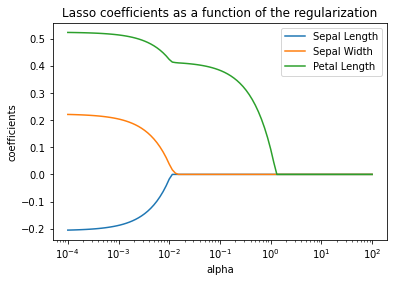

In [29]:
from sklearn import linear_model
lasso = linear_model.Lasso()

alphas_lasso = np.logspace(-4, 2, 100)
coef_lasso = []
for i in alphas_lasso:
    lasso.set_params(alpha = i).fit(iris.x, iris.y)
    coef_lasso.append(lasso.coef_)

columns = ["Sepal Length", "Sepal Width", "Petal Length"]
df_coef = pd.DataFrame(coef_lasso, index=alphas_lasso, columns=columns)
title = 'Lasso coefficients as a function of the regularization'
df_coef.plot(logx=True, title=title)
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.show()

### Ridge v.s. Lasso


Comparing the path of ridge with the path of lasso:

- In ridge regression, all the coefficients tend to reach 0 at the same time.
- In lasso, the coefficients tend towards 0 one by one.
- Lasso selects features with th eappropriate penalty.

<img src="http://jamesmccammondotcom.files.wordpress.com/2014/04/screen-shot-2014-04-19-at-11-19-00-pm.png?w=1200" style="width: 300px;">
This picture comes from [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/)

**Which one to use?**

- Neither ridge regression nor lasso will universally dominate the other.

- In general, one might expect lasso to perform better when the response is a function of only a relatively small number of predictors. However, the number of predictors that is related to the response is never known.

- A technique such as cross-validation can be used in order to determine which approach is better on a particular data set.

<p><a name="elastic"></a></p>

### ElasticNet

- ElasticNet is a linear regression model that combines L1 with L2 regularization 
- This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge. 
- ElasticNet is useful when there are multiple features correlated with one another.

<p><a name="elastic-sklearn"></a></p>

### ElasticNet in Scikit-Learn

Here is the objective function of ElasticNet:
$$\min_{\theta} \frac{1}{2n} \parallel X\theta - y \parallel_2^2 + \alpha \rho | \theta |_1 + \frac{\alpha(1-\rho)}{2} \parallel \theta \parallel_2^2$$
where $n$ refers to the number of observations, and $0 \le \rho \le1$.

- $\alpha$ controls the effects of regularization.
- $\rho$ control the convex combination of L1 and L2. 
    - $\rho = 0$ degenerates back to ridge regression
    - $\rho = 1$ degenerates back to lasso

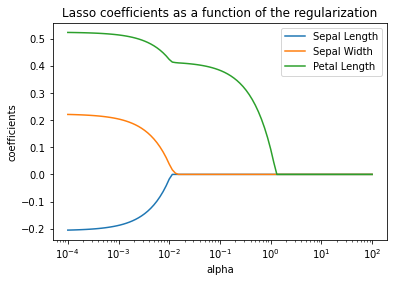

In [30]:
## coefficients
elastic = linear_model.ElasticNet()
alphas_elastic = np.logspace(-2, 4, 1000)
coef_elastic = []

for i in alphas_elastic:
    elastic = linear_model.ElasticNet(l1_ratio =0.5)
    elastic.set_params(alpha = i)
    elastic.fit(iris.x, iris.y)
    coef_elastic.append(elastic.coef_)

    
columns = ["Sepal Length", "Sepal Width", "Petal Length"]
df_coef = pd.DataFrame(coef_lasso, index=alphas_lasso, columns=columns)
title = 'Lasso coefficients as a function of the regularization'
df_coef.plot(logx=True, title=title)
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.show()

- The argument *alpha* corresponds to $\alpha$.
- The argument *l1_radio* corresponds to $\rho$.

<p><a name="ex"></a></p>

## Lecture Example

In [31]:
import pandas as pd

In [32]:
df=pd.read_csv('housing.data')

In [33]:
df.head()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


In [34]:
df=pd.read_csv('housing.data',header=None,sep='\s+')

In [35]:
df.columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','PAD','TAX','PTRATIO','B','LSTAT','MEDV']

#### Column Information:
1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million)
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to five Boston employment centres
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per \$10,000
11. PTRATIO: pupil-teacher ratio by town
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT: \% lower status of the population
14. MEDV: Median value of owner-occupied homes in $1000's!

In [36]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,PAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [37]:
print(df['CHAS'].value_counts())
print(df['PAD'].value_counts())

0    471
1     35
Name: CHAS, dtype: int64
24    132
5     115
4     110
3      38
6      26
8      24
2      24
1      20
7      17
Name: PAD, dtype: int64


Here, we see that **CHAS** and **PAD** are categorical features. We can either exclude them or we can make dummy variables for each. 
- When there are more than two categories, we cannot simply code the variables by more integers,  as scikit-learn estimators expects continuous input, and would interpret the categories as being ordered, which is often not desired. 

### EDA
- we can explore correlations between features and also against the target. 
- Here, we are going to find the correlation in this demo but usually this process requires handling missing values by imputation, feature engineering, for example, creating dummy variables for categorical features or reduce the number of features if we find any tight correlation among features. 
- This process may repeated after traning the model. 

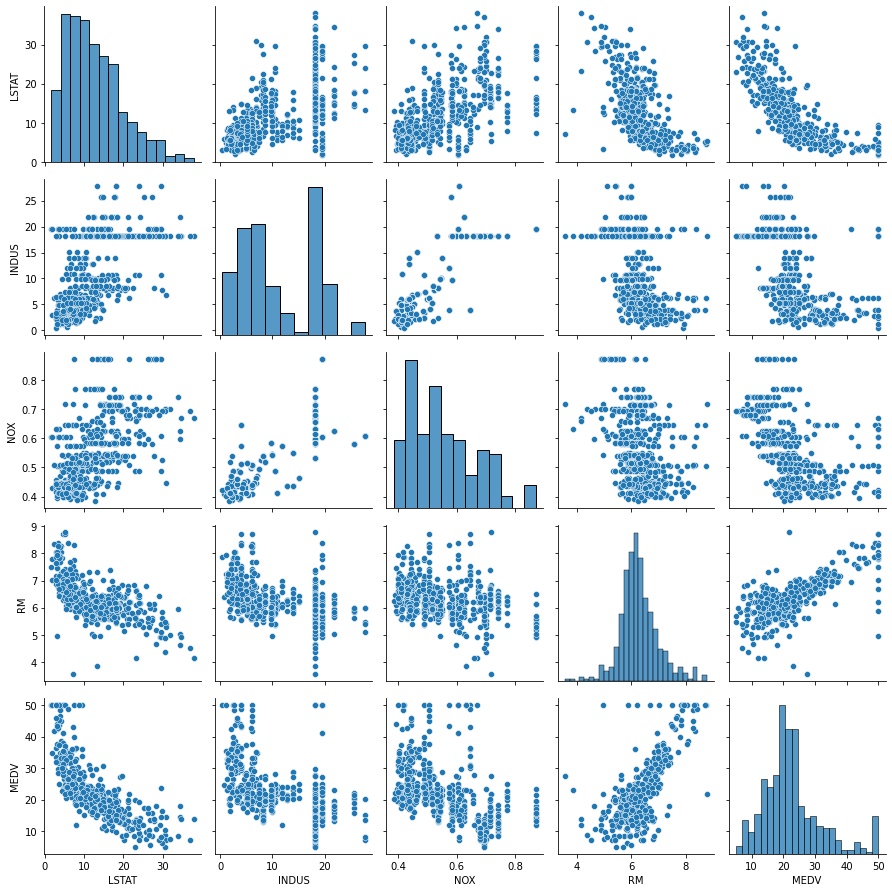

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
cols=['LSTAT','INDUS','NOX','RM','MEDV']
sns.pairplot(df[cols],size=2.5)
plt.tight_layout()
plt.show()


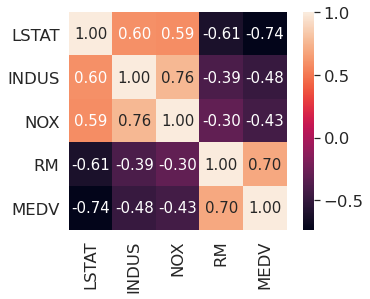

In [39]:
import numpy as np
cm=np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15},yticklabels=cols,xticklabels=cols)
plt.show()

From the correlation investigation, we find that **RM** has the strong correlation to **MEDV**,the target variable, and **LSTAT** has an inverse correlation. The correlation value implies which features are likely be dominated in traing process. 
- Therefore, we are going to train the model using **RM** and **LSTAT** for the first trial, then gradually increase the number of features to examine and select the best model to do predict the final result. 

### Training and Testing ###
1. **RM** Only
2. **RM** + **LSTAT**
3. Features in the diagram above
4. All continuous features

In [40]:
from sklearn.model_selection import train_test_split
X=df[['RM']]
y=df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
slr=LinearRegression()
slr.fit(X_train, y_train)

LinearRegression()

In [43]:
y_train_pred=slr.predict(X_train)

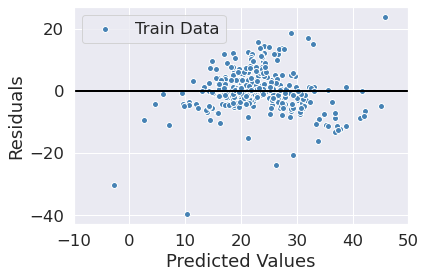

In [44]:
plt.scatter(y_train_pred, y_train_pred-y_train,
           c='steelblue', marker='o',edgecolor='white', label='Train Data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black',lw=2)
plt.xlim([-10,50])
plt.show()

In [45]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f' %(mean_squared_error(y_train,y_train_pred)))
#                                     mean_squared_error(y_test,y_test_pred)))
from sklearn.metrics import r2_score
print('R^2 train: %.3f' %(r2_score(y_train,y_train_pred)))
#                                     r2_score(y_test,y_test_pred)))

MSE train: 42.158
R^2 train: 0.503


The result above indicates that our first model is not good. 

In [46]:
X=df[['RM','LSTAT']]
y=df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
slr=LinearRegression()
slr.fit(X_train, y_train)

LinearRegression()

In [47]:
y_train_pred=slr.predict(X_train)

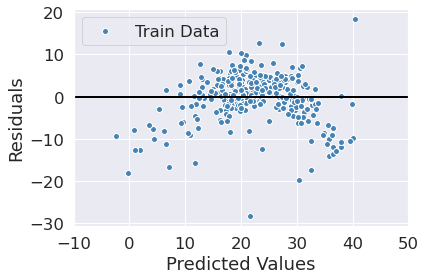

In [48]:
plt.scatter(y_train_pred, y_train_pred-y_train,
           c='steelblue', marker='o',edgecolor='white', label='Train Data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black',lw=2)
plt.xlim([-10,50])
plt.show()

In [49]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f' %(mean_squared_error(y_train,y_train_pred)))
#                                     mean_squared_error(y_test,y_test_pred)))
from sklearn.metrics import r2_score
print('R^2 train: %.3f' %(r2_score(y_train,y_train_pred)))
#                                     r2_score(y_test,y_test_pred)))

MSE train: 29.588
R^2 train: 0.651


Our second model $\beta_0$+$\beta_1$**RM**+$\beta_2$**LSTAT** model is better than the first model. Model1 was way simplified and therefore the model **underfitted**. Therefore, we are going to keep Model2. 
Let's see how our third model would look like. 

In [50]:
X=df[['LSTAT','INDUS','NOX','RM']]
y=df[['MEDV']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
slr=LinearRegression()
slr.fit(X_train, y_train)
y_train_pred=slr.predict(X_train)
print('MSE train: %.3f' %(mean_squared_error(y_train,y_train_pred)))
#                                     mean_squared_error(y_test,y_test_pred)))
from sklearn.metrics import r2_score
print('R^2 train: %.3f' %(r2_score(y_train,y_train_pred)))
#                                     r2_score(y_test,y_test_pred)))

MSE train: 29.264
R^2 train: 0.655


When you compare Model2 and Model3, the number of features has been increaed from 2 to 4. However, in terms of MSE and $R^2$, we can see that there were no significant improvements. In this way, we say that the model is overfitted, meaning the model is **too complex** without a significant improvement. Therefore, we are going to reject Model3. 

In [51]:
X=df[['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','TAX','PTRATIO','B','LSTAT']]
y=df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
slr=LinearRegression()
slr.fit(X_train, y_train)
y_train_pred=slr.predict(X_train)
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f' %(mean_squared_error(y_train,y_train_pred)))
#                                     mean_squared_error(y_test,y_test_pred)))
from sklearn.metrics import r2_score
print('R^2 train: %.3f' %(r2_score(y_train,y_train_pred)))
#                                     r2_score(y_test,y_test_pred)))

MSE train: 21.045
R^2 train: 0.752


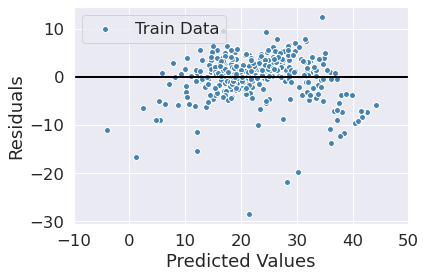

In [52]:
plt.scatter(y_train_pred, y_train_pred-y_train,
           c='steelblue', marker='o',edgecolor='white', label='Train Data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black',lw=2)
plt.xlim([-10,50])
plt.show()

Using all continuous features, we find that there were improvements. Despite Model4 is relatively complex than Model 2, still we find the improvements and to this end, we can choose Model4 among 4 models. 

Now, we are going to apply to the test set and see the result. 

In [53]:
y_test_pred=slr.predict(X_test)

In [54]:
print('MSE train: %.3f, test: %.3f' %(mean_squared_error(y_train,y_train_pred),
                                     mean_squared_error(y_test,y_test_pred)))
from sklearn.metrics import r2_score
print('MSE train: %.3f, test: %.3f' %(r2_score(y_train,y_train_pred),
                                     r2_score(y_test,y_test_pred)))

MSE train: 21.045, test: 29.626
MSE train: 0.752, test: 0.644


### Things to consider
1. The most useful and commonly used coding is via introducing dummy variables: a $K$-level categorical variable is represented by K binary variables, only one of which is on at a time. This is called 1-of-K encoding scheme.

    - Scikit-learn provides a class called OneHotEncoder which encodes categorical variables using 1-of-K scheme, but it only accepts integer-value features as input.

    - Use `pandas.get_dummies()` function to convert categorical variables. This works fine if the data size is not big
    
    - Test yourself and observe if you will get the better result. You will see that it will make a better result. 
    
2. Is there a better to split the data? If we have splitted by the price, high and low, where low price is the training set, we will never have a good result because all high price houses are in the test set. When you have a continous data that is not sequential, then splitting by random will be the pretty good start. When you do a time-series, then splitting by random will hurt. 

3. How about trying other than simple regression? Ploynomial or log? 

4. In this demo, we splitted everytime for the model training. However, in a real World, **we don't**. We split first, then application of different kinds of algorithms or  

<p><a name="multi_reg"></a></p>

## Multiple Linear Regression - Model

- In reality, the output Y often depends on multiple input variables. Suppose that we would like to study the dependence of *Income* on both *Years of Education* and *Seniority*. Since there are two independent variables, the linear model can no longer be represented by a line -- but a **plane** in 3D:

<img src="http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/R/R5_Correlation-Regression/MultipleLinearRegression-Plane.png" style="height: 300px;">
*Source: James et al. Introduction to Statistical Learning (Springer 2013)*

- In general, if the output $Y$ depends on more than one input variable, say $X_1$, $X_2$, ... $X_p$, then we need to generalize our linear model as

$$\hat{Y}=\hat{\beta}_0+\sum_{i=1}^p\hat{\beta}_iX_i$$

- It is very common that we include the constant 1 in $X$ and use the notation

$$\hat{\beta}=(\hat{\beta_0}, \hat{\beta_1}, ... ,\hat{\beta_p})^T$$
$$X=(1, X_1, ..., X_p)$$

- Note that $X \text{ now becomes a } N\times (p+1)$ matrix. Then we can write the model in a matrix notation:

$$\hat{Y}=X\hat{\beta},$$

with $\hat{beta}$ being a $(p+1)\times 1$ matrix (i.e. a vector).

<p><a name="matrix"></a></p>

#### Least Square in Matrix Notation

The matrix notation is convenient for estimating:

- **residual**: In matrix notation, the RSS can be written as the following:

$$RSS(\beta)=(Y-X\beta)^T(Y- X\beta)$$

- **fitting**: Again differentiating RSS with respect to $\beta$ and setting the result to zero (why?), we get the so-called 'normal equation':

$$\hat{\beta}=(X^TX)^{-1}X^T Y$$

- **Note**: when two or more input variables are highly correlated with each other, then $X^T X$ is close to be singular (i.e. $det(X^TX)\sim 0$) and the solution $\hat{\beta}$ will be numerically unstable - any tiny fluctuations of data will cause huge changes of the model.

### Multiple Linear Regression in Scikit-Learn
We create a random data set of two independent variables using the model:

$$Y = 2 - 7.0X_1 + 5.0X_2 + \epsilon$$

In [55]:
np.random.seed(1)
N = 30
## generate a random array with 2 columns
beta = np.array([2, -7, 5])
x_m = np.random.randn(N, 2)
y_m = np.dot(np.append(np.ones((N,1)), x_m, axis=1), beta) + np.random.randn(N)*4

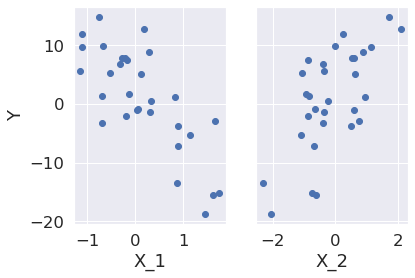

In [56]:
## use subplots to make two scatter plots side by side
_, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(x_m[:,0], y_m)
ax2.scatter(x_m[:,1], y_m)
ax1.set_xlabel('X_1')
ax1.set_ylabel('Y')
ax2.set_xlabel('X_2')
plt.show()

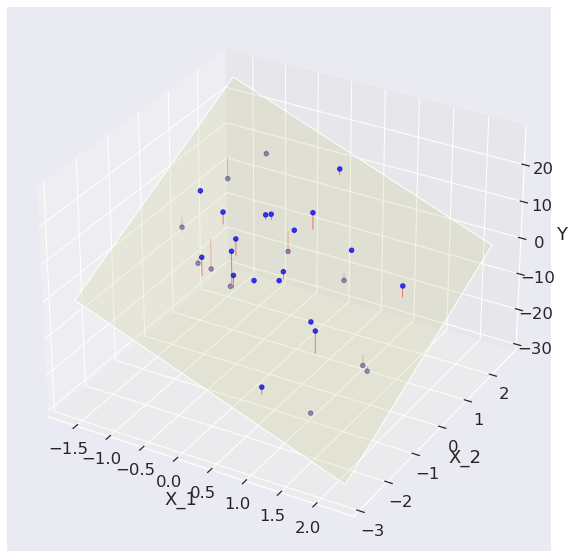

In [57]:
## 3D scatter plot

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 10))
ax = plt.axes(projection='3d')
# plot the data points
X = np.array(list(map(lambda x: [1] + list(x), x_m)))  # Idiomatic Py3, but inefficient on Py2
up = np.where(y_m >= np.sum(X*beta, axis=1))[0]
down = np.where(y_m < np.sum(X*beta, axis=1))[0]
ax.scatter(x_m[up, 0], x_m[up, 1], y_m[up], c='blue', alpha=.8)
ax.scatter(x_m[down, 0], x_m[down, 1], y_m[down], c='Darkblue', alpha=.4)

# plot the error bars
ax = fig.gca(projection='3d')
x_up = x_m[up,:]; y_up = y_m[up]
up_kwargs = dict(color='red', alpha=.6, lw=0.8)
for i, j, k in zip(x_up[:, 0], x_up[:, 1], y_up):
    ax.plot([i, i], [j, j], [k, np.dot(beta, [1, i, j])], **up_kwargs)
    
x_down = x_m[down,:]; y_down = y_m[down]
down_kwargs = dict(color='red', alpha=.3, lw=0.8)
for i, j, k in zip(x_down[:,0], x_down[:,1], y_down):
    ax.plot([i, i], [j, j], [k, np.dot(beta, [1, i, j])], **down_kwargs)
    
    
# plot the plane which represents the true model
x_1 = np.linspace(min(x_m[:, 0])-.5, max(x_m[:, 0])+.5, 25)
x_2 = np.linspace(min(x_m[:, 1])-.5, max(x_m[:, 1])+.5, 25)
x_1, x_2 = np.meshgrid(x_1, x_2)
x_3 = beta[1]*x_1 + beta[2]*x_2 + beta[0]
surface_kwargs = dict(rstride=100, cstride=100, color='yellow', alpha=0.1)
ax.plot_surface(x_1, x_2, x_3, **surface_kwargs)
ax.set_xlabel('X_1')
ax.set_ylabel('X_2')
ax.set_zlabel('Y')
plt.show()

**Fitting and Evaluating Multiple Linear Regression**

If the first variable `x` that we pass into `fit()` contains multiple columns, then a multiple linear model is returned. This is why the model needs to take in a 2D array as its X--to check whether the quesiton is a multi-linear regression one.

In [58]:
from sklearn import linear_model
ols = linear_model.LinearRegression()
ols.fit(x_m, y_m)
print("beta_1, beta_2: " + str(np.round(ols.coef_, 3)))
print("beta_0: " + str(np.round(ols.intercept_, 3)))
print("RSS: %.2f" % np.sum((ols.predict(x_m) - y_m) ** 2))
print("R^2: %.5f" % ols.score(x_m, y_m))

beta_1, beta_2: [-6.619  4.436]
beta_0: 2.523
RSS: 356.34
R^2: 0.83938


- By comparing with the true model $Y = 2 - 7.0X_1 + 5.0X_2 + \epsilon$, we can see the estimated coefficients are close to the true values.

**Regression in terms of the Matrix Formula**

Let's calculate the coefficients by using the normal equation we just derived:
$$\hat{\beta}=(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$

In [59]:
import numpy as np
## transform x to a matrix
x_m = np.mat(x_m)
## y transpose converts y into a column vector
y_m = np.mat(y_m).T
## add a column of 1’s to x
x_m = np.column_stack((np.ones([x_m.shape[0], 1]), x_m))
## matrix.I returns the inverse of that matrix
(x_m.T*x_m).I * x_m.T * y_m

matrix([[ 2.52343727],
        [-6.6191147 ],
        [ 4.43620544]])